In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
def readMatrixFromFile(fname):
    '''Read matrix from file fname.'''
    
    f = open(fname, 'r')

    line = f.readline()
    if not line.startswith('ARMA_MAT_TXT'):
        raise Excetption('Not ARMA!')

    line = f.readline()
    rows, cols = line.strip('\n').split(sep=' ')
    (rows, cols) = (int(rows), int(cols))
    L = np.zeros((rows, cols), dtype=np.complex64)
    L.shape

    i = 0
    for line in f:
        x = line.strip(' \n').split(' ')
        L[i,:] = [complex(float(a[0]), float(a[1])) for a in [s.strip('()').split(',') for s in x]]
        i += 1

    f.close()
    
    return L

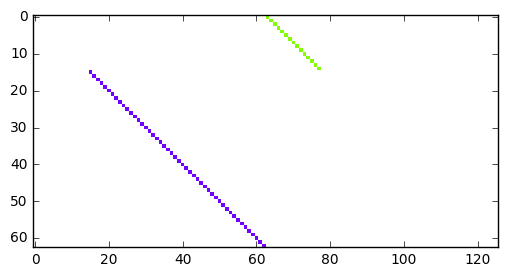

In [5]:
matname = "../build/Lmatrix.dat"
L = readMatrixFromFile(matname)

Lno = np.abs(L) < np.spacing(1.)
La = (np.angle(-L) + np.pi)/(2*np.pi)
La[Lno] = np.nan

fig = plt.figure()
ax = fig.gca()
ax.imshow(La, aspect='equal', cmap='hsv', interpolation='none', vmin=0., vmax=1.)
plt.show()